In [52]:
import os
os.chdir('/Users/VSR/Desktop/AIT')

In [53]:
import pandas as pd
import csv
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import re
from collections import defaultdict
import pprint
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import random




In [54]:
# Increase CSV field size limit
csv.field_size_limit(1000000000)


1000000000

In [55]:
df = pd.read_csv("state-of-the-union.csv", names=["Year", "Speech"], header=None)


In [56]:
# Get the stopwords for the English language
nltk_sw = stopwords.words('english')
sw_df = pd.read_csv('stopwords-en.csv', header = None)

In [57]:
sw_list = sw_df[0].tolist()

In [58]:
stoplist = nltk_sw +sw_list

In [59]:
# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [60]:
def clean(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers and punctuation marks
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s-]', '', text)  # Include hyphen as an exception
    return text

In [61]:
def split_words(text):
    # Tokenize text into words
    token_words = word_tokenize(text)
    # Initialize an empty list to store tokens
    token_list = []
    # Iterate over tokenized words
    for i in token_words:
        # Split hyphenated words into separate tokens
        if '-' in i:
            token_list.extend(i.split('-'))
        else:
            token_list.append(i)
    return token_list

In [62]:
def lemmatize(tokens):
    # Remove stopwords and lemmatize each token
    lem_tokens = []
    for j in tokens:
        # Lemmatize token
        j = lemmatizer.lemmatize(j)
        # Check if token is not a stopword and its length is at least 2
        if j.strip() and len(j.strip()) >= 2 and j not in stoplist:
            # Append token to processed tokens list
            lem_tokens.append(j)
    return lem_tokens
    


In [78]:
def stem(tokens):
    # Remove stopwords and stem each token
    stem_tokens = []
    for j in tokens:
        # Stem token
        j = stemmer.stem(j)
        # Check if token is not a stopword and its length is at least 2
        if j.strip() and len(j.strip()) >= 2 and j not in stoplist:
            # Append token to processed tokens list
            stem_tokens.append(j)
    return stem_tokens


In [79]:
def preprocessing(text):
    # Convert text to lowercase, remove numbers, and punctuation marks
    text = clean(text)
    # Split words and hyphenated words
    words = split_words(text)
    # Lemmatize tokens, remove stopwords, and filter tokens
    tokens_1 = lemmatize(words)
    tokens = stem(tokens_1)
    return tokens

In [81]:
# Apply preprocessing, lemmatization, and stemming to the "Speech" column
df['Processed_Speech'] = df['Speech'].apply(preprocessing)



In [82]:
# Count word frequencies
frequency = defaultdict(int)
for speech in processed_corpus:
    for token in speech:
        frequency[token] += 1

In [83]:
# Only keep tokens that appear more than once
processed_corpus = [[token for token in speech if frequency[token] > 1] for speech in processed_corpus]


In [84]:
len(processed_corpus)

226

In [85]:
pprint.pprint(processed_corpus)

[['georg',
  'washington',
  'januari',
  'fellow',
  'citizen',
  'senat',
  'hous',
  'repres',
  'embrac',
  'great',
  'satisfact',
  'opportun',
  'present',
  'congratul',
  'present',
  'favor',
  'prospect',
  'public',
  'affair',
  'recent',
  'access',
  'import',
  'state',
  'north',
  'carolina',
  'constitut',
  'unit',
  'state',
  'offici',
  'inform',
  'ha',
  'receiv',
  'rise',
  'credit',
  'respect',
  'countri',
  'gener',
  'increas',
  'good',
  'toward',
  'govern',
  'union',
  'concord',
  'peac',
  'plenti',
  'bless',
  'circumst',
  'auspici',
  'emin',
  'degre',
  'nation',
  'prosper',
  'resum',
  'consult',
  'gener',
  'good',
  'deriv',
  'encourag',
  'reflect',
  'measur',
  'last',
  'session',
  'satisfactori',
  'constitu',
  'novelti',
  'difficulti',
  'work',
  'allow',
  'hope',
  'still',
  'realiz',
  'expect',
  'secur',
  'bless',
  'graciou',
  'provid',
  'ha',
  'place',
  'within',
  'reach',
  'cours',
  'present',
  'import',
  

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [86]:
# Create a Gensim dictionary from the processed corpus
dictionary = corpora.Dictionary(processed_corpus)

# Print the dictionary
print(dictionary)

Dictionary<7916 unique tokens: ['abroad', 'access', 'accord', 'add', 'adequ']...>


In [87]:
pprint.pprint(dictionary.token2id)

{'aana': 5805,
 'abandon': 1597,
 'abat': 906,
 'abdic': 3827,
 'abduct': 4515,
 'abet': 1282,
 'abettor': 2503,
 'abey': 5089,
 'abhor': 4990,
 'abhorr': 4074,
 'abid': 2655,
 'abil': 1283,
 'abl': 342,
 'ablest': 1713,
 'abli': 2934,
 'abnorm': 6239,
 'abod': 3534,
 'abolish': 2100,
 'abolit': 2238,
 'abomin': 3470,
 'aborigin': 3471,
 'abort': 4051,
 'abound': 1085,
 'abraham': 4951,
 'abreast': 6885,
 'abridg': 343,
 'abroad': 0,
 'abrog': 3909,
 'abrupt': 5567,
 'abruptli': 3535,
 'abscond': 3153,
 'absenc': 3003,
 'absent': 4694,
 'absente': 5700,
 'absolut': 1086,
 'absolv': 4412,
 'absorb': 3536,
 'absorpt': 5090,
 'abstain': 3154,
 'abstin': 3771,
 'abstract': 3344,
 'absurd': 4917,
 'abund': 344,
 'abundantli': 345,
 'abus': 1087,
 'academ': 3345,
 'academi': 1714,
 'acapulco': 5701,
 'acced': 2428,
 'acceler': 1598,
 'accent': 5021,
 'accentu': 6112,
 'accept': 615,
 'access': 1,
 'accessori': 5568,
 'accid': 5288,
 'accident': 3537,
 'acclaim': 6465,
 'accommod': 616,
 'acc

In [88]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [89]:
tfidf_model = models.TfidfModel(bow_corpus)


In [90]:
tfidf_corpus = tfidf_model[bow_corpus]

In [91]:
for doc in tfidf_corpus:
    pprint.pprint(doc)

[(0, 0.02265557271350552),
 (1, 0.04335950277705841),
 (2, 0.023279535788623733),
 (3, 0.033248368180616356),
 (4, 0.02204135946131089),
 (5, 0.014070207858915067),
 (6, 0.03448330267473526),
 (7, 0.014570964291589217),
 (8, 0.010732908496363762),
 (9, 0.054801402047280394),
 (10, 0.03781533675680969),
 (11, 0.09733248300538773),
 (12, 0.030509330745782135),
 (13, 0.02690048171291471),
 (14, 0.012845534092698466),
 (15, 0.02621683233575335),
 (16, 0.008296087103140995),
 (17, 0.0010577009868683765),
 (18, 0.006614168589908286),
 (19, 0.03284519697073128),
 (20, 0.03088912933678185),
 (21, 0.10170463463085927),
 (22, 0.015078182275748392),
 (23, 0.027948779793777096),
 (24, 0.04082256783559884),
 (25, 0.036631861925363884),
 (26, 0.029647510368941123),
 (27, 0.11224978300320226),
 (28, 0.005199301521110135),
 (29, 0.02690048171291471),
 (30, 0.02621683233575335),
 (31, 0.023606438416027237),
 (32, 0.015592030747967585),
 (33, 0.08817440477488303),
 (34, 0.023913563217217028),
 (35, 0.09

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



###

# LSI

In [76]:
coherence_values = []
for num_topics in range(5, 31):
    lsi_model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=num_topics)
    coherencemodel = CoherenceModel(model=lsi_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())


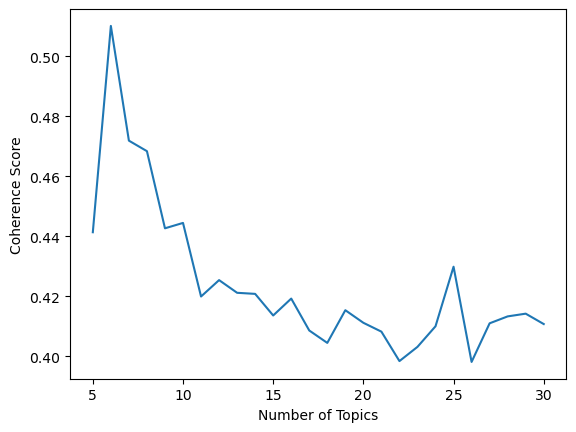

In [77]:

import matplotlib.pyplot as plt
plt.plot(range(5, 31), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()


In [92]:
optimal_num_topics = coherence_values.index(max(coherence_values)) + 5


In [93]:
optimal_num_topics


6

In [94]:
lsi_model = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=optimal_num_topics)



In [95]:
# Print the topics
print("LSI Topics:")
pprint.pprint(lsi_model.print_topics())

LSI Topics:
[(0,
  '0.114*"program" + 0.080*"help" + 0.078*"tonight" + 0.076*"job" + '
  '0.070*"budget" + 0.065*"america" + 0.062*"econom" + 0.062*"treati" + '
  '0.060*"child" + 0.059*"mexico"'),
 (1,
  '0.170*"program" + 0.160*"tonight" + 0.148*"job" + 0.131*"help" + '
  '0.115*"budget" + 0.104*"child" + 0.094*"america" + 0.093*"spend" + '
  '0.091*"billion" + 0.090*"today"'),
 (2,
  '-0.200*"tonight" + 0.137*"program" + -0.131*"terrorist" + -0.120*"job" + '
  '-0.115*"iraq" + 0.115*"farm" + -0.111*"child" + 0.105*"interst" + '
  '0.103*"econom" + 0.102*"agricultur"'),
 (3,
  '0.170*"silver" + -0.133*"program" + -0.127*"militia" + 0.121*"gold" + '
  '0.099*"circul" + -0.098*"communist" + -0.096*"tribe" + 0.089*"coin" + '
  '0.088*"coinag" + 0.087*"arbitr"'),
 (4,
  '-0.256*"interst" + -0.213*"corpor" + 0.158*"mexico" + -0.152*"railroad" + '
  '0.146*"program" + 0.131*"soviet" + 0.121*"communist" + 0.107*"texa" + '
  '-0.102*"terrorist" + -0.089*"iraq"'),
 (5,
  '0.329*"terrorist" + 

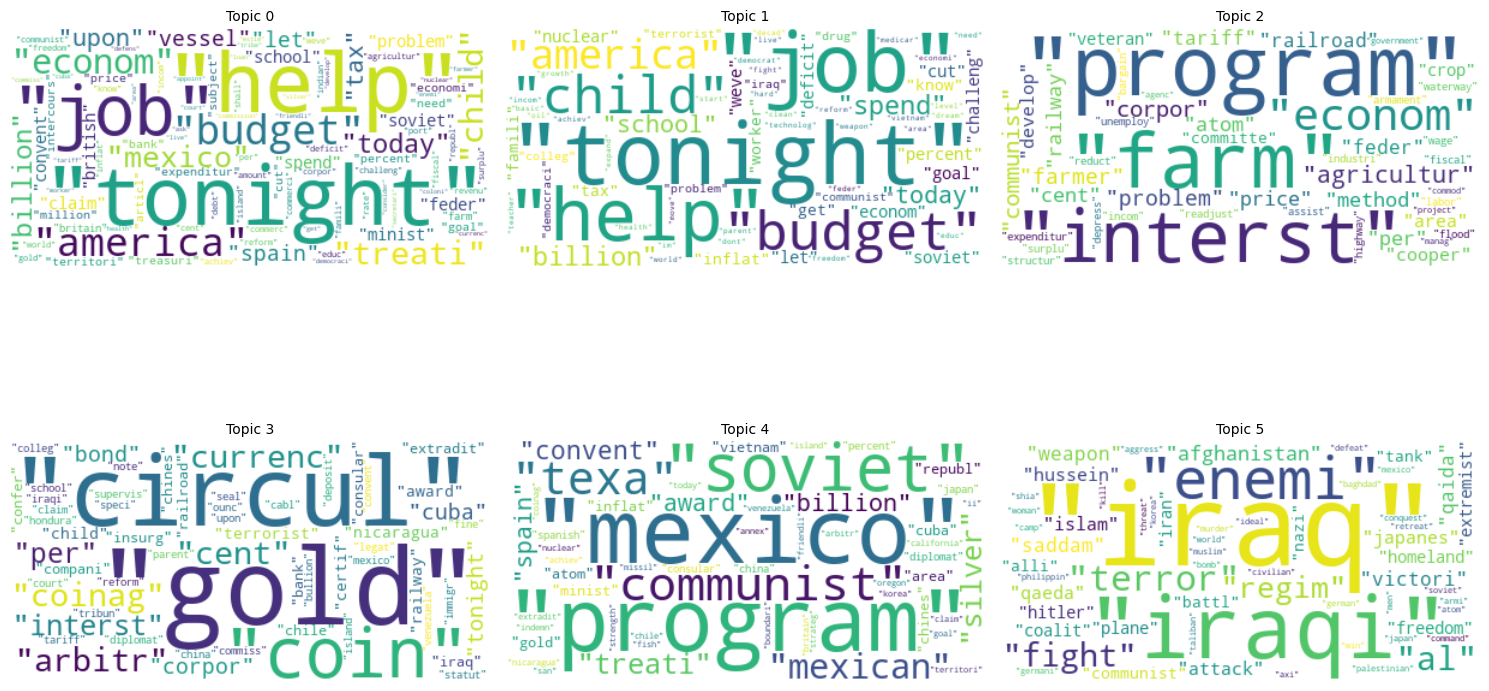

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the topic-term distributions
lsi_topics = lsi_model.print_topics(num_topics=optimal_num_topics, num_words=100)

# Create a figure with 2x5 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Generate word clouds for each topic
for i in range(optimal_num_topics):
    # Initialize dictionary to store word weights
    topic_words = {}
    
    # Extract words and weights for the current topic
    for temp in lsi_topics[i][1].split(" ")[1:]:
        if temp != '+':
            word = temp.split('*')[1]
            weight = float(temp.split('*')[0])
            topic_words[word] = weight
    
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(topic_words)
    
    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title('Topic ' + str(i), fontsize=10)
    axes[i].axis('off')

# Hide remaining subplots
for j in range(optimal_num_topics, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [97]:
lsi_model2 = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=10)


In [98]:
lsi_topics_2 = lsi_model2.print_topics(num_topics=30, num_words=30)

In [99]:
random.seed(111)
sampled_topics = random.sample(lsi_topics_2, 10)

In [100]:
for topic in sampled_topics:
    topic_id, words = topic
    pprint.pprint(f"Topic {topic_id}: {words}")

('Topic 3: 0.170*"silver" + -0.134*"program" + -0.127*"militia" + 0.122*"gold" '
 '+ 0.099*"circul" + -0.097*"communist" + -0.096*"tribe" + 0.089*"coin" + '
 '0.089*"coinag" + 0.087*"arbitr" + 0.087*"interst" + 0.087*"cent" + '
 '0.086*"currenc" + -0.084*"gentleman" + 0.082*"per" + -0.082*"soviet" + '
 '0.080*"corpor" + 0.077*"cuba" + 0.072*"tonight" + 0.072*"bond" + '
 '0.067*"terrorist" + 0.067*"nicaragua" + 0.066*"award" + 0.066*"child" + '
 '-0.065*"defens" + 0.064*"certif" + 0.064*"railway" + 0.062*"extradit" + '
 '0.061*"compani" + 0.061*"iraq"')
('Topic 5: -0.332*"terrorist" + -0.242*"iraq" + -0.214*"iraqi" + '
 '-0.171*"enemi" + -0.155*"terror" + -0.137*"al" + -0.133*"fight" + '
 '-0.110*"regim" + -0.108*"afghanistan" + 0.104*"job" + -0.090*"victori" + '
 '0.086*"deficit" + -0.085*"weapon" + -0.085*"qaida" + -0.084*"saddam" + '
 '0.084*"cut" + 0.083*"weve" + 0.080*"budget" + 0.079*"dont" + '
 '-0.079*"japanes" + -0.077*"qaeda" + 0.074*"spend" + -0.073*"islam" + '
 '0.073*"colle

In [101]:
topic_names = {
    3: "Economic Policies ",
    5: "War on Terror ",
    7: "Border Issues ",
    1: "Domestic Economic Programs",
    9: "InternationalRelations",
    8: "Currency ",
    6: "Border Security and Terrorism",
    0: "Government Programs ",
    4: "Commerce and Trade",
    2: "National Security and Counterterrorism"
}


# Call the function to print the topics with their names
for i, topic_name in topic_names.items():
    print(f"Topic {i}: {topic_name}")

Topic 3: Economic Policies 
Topic 5: War on Terror 
Topic 7: Border Issues 
Topic 1: Domestic Economic Programs
Topic 9: InternationalRelations
Topic 8: Currency 
Topic 6: Border Security and Terrorism
Topic 0: Government Programs 
Topic 4: Commerce and Trade
Topic 2: National Security and Counterterrorism


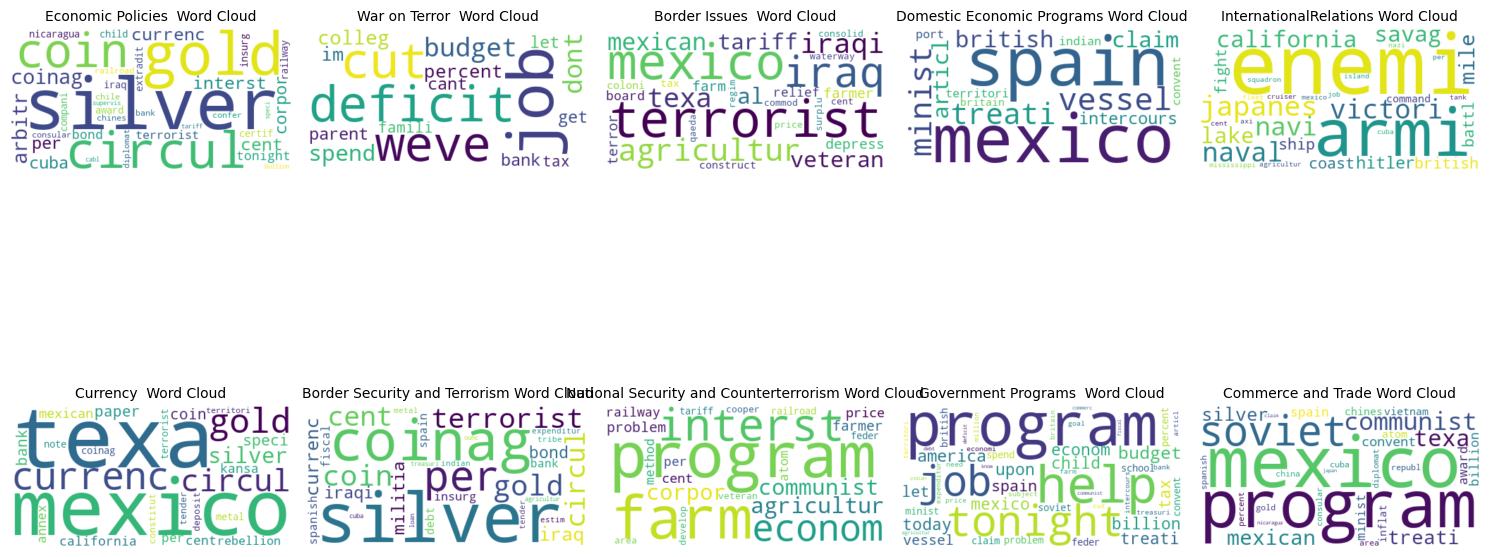

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract words and their weights from sampled topics
topic_words = {}
for topic_id, words in sampled_topics:
    topic_words[topic_names[topic_id]] = {}
    for word, weight in lsi_model2.show_topic(topic_id, topn=50):
        topic_words[topic_names[topic_id]][word] = weight

# Create word clouds for each sampled topic
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()
for i, (topic_name, words) in enumerate(topic_words.items()):
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(words)
    
    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(topic_name + ' Word Cloud', fontsize=10)
    axes[i].axis('off')

# Hide remaining subplots
for j in range(len(topic_words), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [105]:
# Initialize dictionaries to store the year with the maximum proportion for each topic
max_proportion_years = {topic_id: None for topic_id in topic_names.keys()}
max_proportions = {topic_id: -1 for topic_id in topic_names.keys()}

# Iterate over each document
for i, doc_topics in enumerate(lsi_model2[tfidf_corpus]):
    year = df['Year'][i]  # Assuming 'Year' is the column containing the year of the speech
    for topic_id, proportion in doc_topics:
        if topic_id in topic_names:
            # Update max proportion and corresponding year if current proportion is higher
            if proportion > max_proportions[topic_id]:
                max_proportions[topic_id] = proportion
                max_proportion_years[topic_id] = year

# Print the years with the maximum proportion for each topic
for topic_id, year in max_proportion_years.items():
    print(f"Topic {topic_id}: Year {year} has the maximum proportion")



Topic 3: Year 1889 has the maximum proportion
Topic 5: Year 1993 has the maximum proportion
Topic 7: Year 1926 has the maximum proportion
Topic 1: Year 1824 has the maximum proportion
Topic 9: Year 1945 has the maximum proportion
Topic 8: Year 1868 has the maximum proportion
Topic 6: Year 1889 has the maximum proportion
Topic 0: Year 1954 has the maximum proportion
Topic 4: Year 1845 has the maximum proportion
Topic 2: Year 1926 has the maximum proportion


#

# LDA

In [106]:
# Calculate coherence scores for different numbers of topics
coherence_values_lda = []
for num_topics in range(5, 21):
    lda_model = models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values_lda.append(coherence_lda)

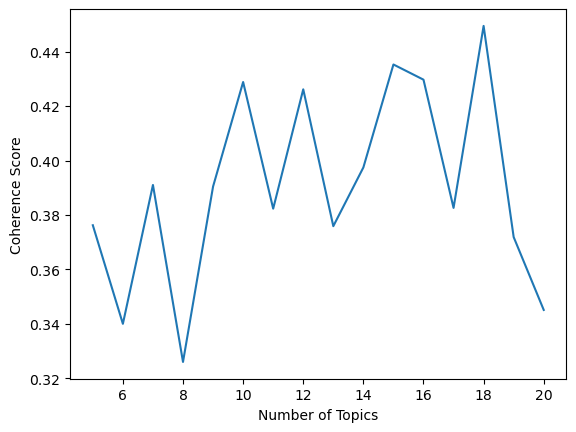

In [107]:
import matplotlib.pyplot as plt
plt.plot(range(5, 21), coherence_values_lda)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()


In [108]:
optimal_num_topics_lda = coherence_values_lda.index(max(coherence_values_lda)) + 5
print("Optimal Number of Topics for LDA:", optimal_num_topics_lda)

Optimal Number of Topics for LDA: 18


In [109]:
# Perform LDA topic modeling
lda_model = models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=optimal_num_topics_lda)


In [110]:
# Print the topics
print("LDA Topics:")
pprint.pprint(lda_model.print_topics())


LDA Topics:
[(0,
  '0.001*"british" + 0.001*"program" + 0.001*"mexico" + 0.001*"enemi" + '
  '0.001*"minist" + 0.001*"saddam" + 0.001*"hussein" + 0.001*"correspond" + '
  '0.001*"cruiser" + 0.001*"goal"'),
 (1,
  '0.001*"spain" + 0.001*"job" + 0.001*"articl" + 0.001*"vessel" + '
  '0.001*"coloni" + 0.001*"leagu" + 0.001*"court" + 0.001*"spend" + '
  '0.001*"port" + 0.000*"program"'),
 (2,
  '0.001*"mexico" + 0.001*"provinc" + 0.001*"mexican" + 0.001*"spain" + '
  '0.001*"treati" + 0.001*"cession" + 0.001*"legislatur" + 0.001*"territori" + '
  '0.001*"commission" + 0.001*"coloni"'),
 (3,
  '0.001*"gentleman" + 0.001*"mexico" + 0.001*"tonight" + 0.001*"program" + '
  '0.001*"budget" + 0.001*"philadelphia" + 0.001*"billion" + 0.001*"texa" + '
  '0.001*"domingo" + 0.001*"drug"'),
 (4,
  '0.001*"texa" + 0.001*"program" + 0.001*"mexico" + 0.001*"today" + '
  '0.001*"missil" + 0.001*"soviet" + 0.001*"econom" + 0.001*"british" + '
  '0.000*"mexican" + 0.000*"award"'),
 (5,
  '0.001*"spain" + 0

In [111]:
lda_model2=models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=30)

In [ ]:
lda_topics_2 = lda_model2.print_topics(num_topics=30, num_words=50)

In [ ]:
random.seed(111)
sampled_topics = random.sample(lda_topics_2, 10)


In [ ]:
for topic in sampled_topics:
    topic_id, words = topic
    pprint.pprint(f"Topic {topic_id}: {words}")

In [ ]:
topic_names = {
    26: " Finance",
    6: "Foreign Relations",
    10: "Foreign Policy",
    15: "Economic challenges",
    28: "National Security",
    12: "International Relations ",
    13: "Social Issues",
    19: "National Defense",
    5: "Civil Rights ",
    20: "Transportation and Infrastructure )"
}

# Call the function to print the topics with their names
for i, topic_name in topic_names.items():
    print(f"Topic {i}: {topic_name}")

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract words and their weights from sampled topics
topic_words = {}
for topic_id, words in sampled_topics:
    topic_words[topic_names[topic_id]] = {}
    for word, weight in lda_model2.show_topic(topic_id, topn=50):
        topic_words[topic_names[topic_id]][word] = weight

# Create word clouds for each sampled topic
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for i, (topic_name, words) in enumerate(topic_words.items()):
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(words)
    
    # Plot word cloud
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(topic_name + ' Word Cloud', fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Initialize dictionaries to store the year with the maximum proportion for each topic
max_proportion_years = {topic_id: None for topic_id in topic_names.keys()}
max_proportions = {topic_id: -1 for topic_id in topic_names.keys()}

# Iterate over each document
for i, doc_topics in enumerate(tfidf_corpus):
    year = df['Year'][i]  # Assuming 'Year' is the column containing the year of the speech
    for topic_id, tfidf_value in doc_topics:
        if topic_id in topic_names:
            # Update max proportion and corresponding year if current proportion is higher
            if tfidf_value > max_proportions[topic_id]:
                max_proportions[topic_id] = tfidf_value
                max_proportion_years[topic_id] = year

# Print the years with the maximum proportion for each topic
for topic_id, year in max_proportion_years.items():
    print(f"Topic {topic_id}: Year {year} has the maximum proportion")


# 

In [ ]:
# Question 4

In [33]:
# Filter speeches from 1901 to 2020
data = df[(df['Year'] >= 1901) & (df['Year'] <= 2020)]


In [34]:
# Convert 'Year' column to decades
data['Decade'] = (data['Year'] // 10) * 10



/var/folders/xx/pff6mw9j7vj0zm_pw9v03rnc0000gp/T/ipykernel_22095/879271503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Decade'] = (data['Year'] // 10) * 10


In [35]:
# Aggregate speeches by decades
c_data = data.groupby('Decade')['Speech'].apply(' '.join).reset_index()


In [36]:
stoplist = stopwords.words('english')

In [37]:
stoplist.extend(["state", "of", "the", "union", "address", "tonight"])


In [38]:
# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()

In [39]:
def clean(text):
    # Remove numbers and punctuation marks
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s-]', '', text)  # Include hyphen as an exception
    return text

def lemmatize(tokens):
    # Lemmatize each token
    lem_tokens = []
    for token in tokens:
        # Lemmatize token
        lem_token = lemmatizer.lemmatize(token)
        # Check if token is not a stopword and its length is at least 2
        if lem_token.strip() and len(lem_token.strip()) > 3 and lem_token not in stoplist:
            # Append token to processed tokens list
            lem_tokens.append(lem_token)
    return lem_tokens

def preprocessing(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords from the tokens
    tokens_without_stopwords = [word for word in words if word.lower() not in stoplist]

    # Lemmatize remaining tokens
    lem_tokens = lemmatize(tokens_without_stopwords)

    # Remove numbers, punctuation marks, and convert to lowercase
    clean_tokens = [clean(token.lower()) for token in lem_tokens]

    return clean_tokens

In [40]:
c_data['Processed_Speech'] = c_data['Speech'].apply(preprocessing)


In [41]:
frequency = defaultdict(int)
for speech in c_data['Processed_Speech']:
    for token in speech:
        frequency[token] += 1

# Filter out tokens that appear only once
c_data['Processed_Speech'] = [[token for token in speech if frequency[token] > 1] for speech in c_data['Processed_Speech']]


In [42]:
texts = c_data['Processed_Speech'].tolist()


In [43]:
dictionary = corpora.Dictionary(texts)

In [44]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [45]:
# TF-IDF Vectors
tfidf_model = models.TfidfModel(corpus)
tfidf_corpus = tfidf_model[corpus]


# LDA Model

In [46]:
lda_model = models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=14)

In [47]:
corpus_lda_decade=lda_model[tfidf_corpus]

In [49]:
topics = lda_model.print_topics(num_topics=15, num_words=20)

for topic in topics:
    print(topic)


(0, '0.000*"ought" + 0.000*"freight" + 0.000*"calvin" + 0.000*"terrorist" + 0.000*"consolidation" + 0.000*"armament" + 0.000*"revision" + 0.000*"marketing" + 0.000*"shall" + 0.000*"cotton" + 0.000*"tribunal" + 0.000*"railway" + 0.000*"irrigation" + 0.000*"lakes" + 0.000*"undoubtedly" + 0.000*"league" + 0.000*"to-day" + 0.000*"livestock" + 0.000*"valuation" + 0.000*"waterways"')
(1, '0.000*"nuclear" + 0.000*"soviet" + 0.000*"environment" + 0.000*"solar" + 0.000*"middle-class" + 0.000*"program" + 0.000*"technology" + 0.000*"achieve" + 0.000*"adequate" + 0.000*"drug" + 0.000*"ought" + 0.000*"terrorist" + 0.000*"thats" + 0.000*"iraqi" + 0.000*"internet" + 0.000*"hussein" + 0.000*"troop" + 0.000*"missile" + 0.000*"innovation" + 0.000*"japanese"')
(2, '0.001*"soviet" + 0.000*"communist" + 0.000*"shall" + 0.000*"vietnam" + 0.000*"program" + 0.000*"decree" + 0.000*"atomic" + 0.000*"nuclear" + 0.000*"communists" + 0.000*"anti-trust" + 0.000*"missile" + 0.000*"consular" + 0.000*"goal" + 0.000*"s

In [50]:
decades = c_data['Decade'].tolist()

In [51]:
for i in range(len(decades)):
    print("Decade:", decades[i])
    print("LDA Topics:")
    print(corpus_lda_decade[i])
    print("\n\n")


Decade: 1900
LDA Topics:
[(7, 0.87253696)]



Decade: 1910
LDA Topics:
[(2, 0.8814132)]



Decade: 1920
LDA Topics:
[(0, 0.01495342), (1, 0.014953349), (2, 0.014953857), (3, 0.01495336), (4, 0.01495336), (5, 0.014953357), (6, 0.8056055), (7, 0.014953565), (8, 0.014953351), (9, 0.014953353), (10, 0.014953355), (11, 0.0149533525), (12, 0.01495345), (13, 0.014953388)]



Decade: 1930
LDA Topics:
[(12, 0.88018364)]



Decade: 1940
LDA Topics:
[(0, 0.013899852), (1, 0.013899845), (2, 0.81930166), (3, 0.013899861), (4, 0.013899855), (5, 0.013899955), (6, 0.013899864), (7, 0.013899963), (8, 0.013899846), (9, 0.013899849), (10, 0.013899853), (11, 0.013899853), (12, 0.013899888), (13, 0.013899853)]



Decade: 1950
LDA Topics:
[(2, 0.8745975)]



Decade: 1960
LDA Topics:
[(0, 0.010774029), (1, 0.010774028), (2, 0.8599375), (3, 0.010774052), (4, 0.010774038), (5, 0.010774032), (6, 0.010774032), (7, 0.010774035), (8, 0.0107740285), (9, 0.010774057), (10, 0.010774054), (11, 0.010774051), (12, 0.010